In [2]:

import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

In [3]:
path = 'BBDD_evaluacion.xlsx' #cambiar aca por la ruta del archivo
df_og = pd.read_excel(path)
df_og

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,NaN,0.000011,0.010175,6.893503e+05,Low
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low


In [4]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINCIA               22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              20 non-null     float64
 3   poverty                 20 non-null     float64
 4   deficient_infra         20 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           20 non-null     float64
 7   birth_mortal            20 non-null     float64
 8   pop                     21 non-null     float64
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
 11  Score                   22 non-null     float64
 12  poverty_index           22 non-null     object 
dtypes: float64(11), object(2)
memory usage: 2.4+ KB


In [5]:
# Dimensiones del DataFrame
df_og.shape

(22, 13)

In [6]:
# Datos nulos por columna
df_og.isna().sum().sort_values()

PROVINCIA                 0
gdp                       0
school_dropout            0
movie_theatres_per_cap    0
poverty_index             0
Score                     0
doctors_per_cap           0
pop                       1
birth_mortal              2
no_healthcare             2
deficient_infra           2
poverty                   2
illiteracy                2
dtype: int64

In [7]:
# Suma de casos duplicados
df_og.duplicated().sum()

np.int64(0)

In [8]:
df_og["pop"].describe()

count    2.100000e+01
mean     1.609089e+06
std      3.278378e+06
min      2.739640e+05
25%      5.091080e+05
50%      6.810550e+05
75%      1.214441e+06
max      1.562508e+07
Name: pop, dtype: float64

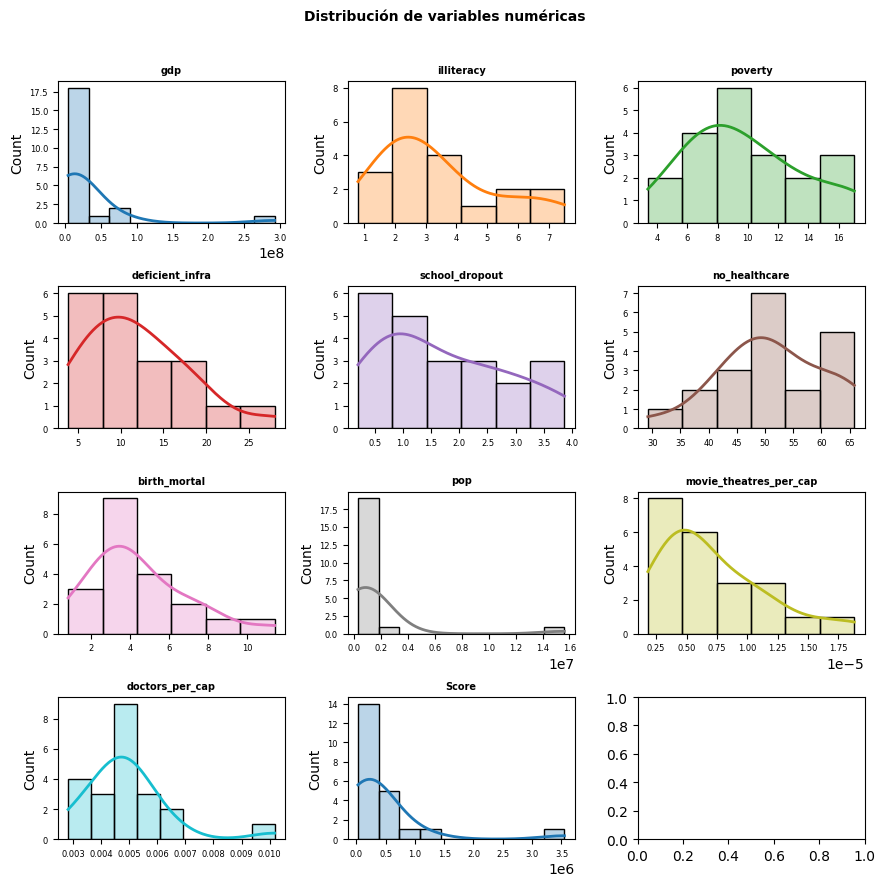

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 9))
axes = axes.flat
columnas_numeric = df_og.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_og,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold");

In [10]:
df_mod= df_og.copy()
# Normalización Min-Max de la columna "pop"
scaler = MinMaxScaler()
df_mod["N_pop"] = scaler.fit_transform(df_mod[["pop"]])

df_mod[["pop", "N_pop"]]

,pop,N_pop
0,15625084.0,1.000000
1,367828.0,0.006114
2,NaN,NaN
3,992595.0,0.046813
4,1055259.0,0.050895
5,509108.0,0.015318
6,1235994.0,0.062668
7,530162.0,0.016689
8,673307.0,0.026014
9,318951.0,0.002931


In [11]:
df_og["pop"].describe(), df_mod["pop"].describe()

(count    2.100000e+01
 mean     1.609089e+06
 std      3.278378e+06
 min      2.739640e+05
 25%      5.091080e+05
 50%      6.810550e+05
 75%      1.214441e+06
 max      1.562508e+07
 Name: pop, dtype: float64,
 count    2.100000e+01
 mean     1.609089e+06
 std      3.278378e+06
 min      2.739640e+05
 25%      5.091080e+05
 50%      6.810550e+05
 75%      1.214441e+06
 max      1.562508e+07
 Name: pop, dtype: float64)

In [12]:
# La Variable POP tiene todo menos una distibucion nomal, por lo tanto le imputaremos la mediana
imputer = SimpleImputer(strategy='median')
df_mod["pop"] = imputer.fit_transform(df_mod[["pop"]])
df_mod["N_pop"] = imputer.fit_transform(df_mod[["N_pop"]])
df_mod[["pop", "N_pop"]]

,pop,N_pop
0,15625084.0,1.000000
1,367828.0,0.006114
2,681055.0,0.026519
3,992595.0,0.046813
4,1055259.0,0.050895
5,509108.0,0.015318
6,1235994.0,0.062668
7,530162.0,0.016689
8,673307.0,0.026014
9,318951.0,0.002931


In [13]:
min=df_mod['N_pop'].min()
Q1=df_mod['N_pop'].quantile(0.25) # 25%
Q2=df_mod['N_pop'].quantile(0.50) # 50%
Q3=df_mod['N_pop'].quantile(0.75) # 75%
IQR=Q3-Q1 # Threshold #
max=df_mod['N_pop'].max()
mu=df_mod['N_pop'].mean()
sd=df_mod['N_pop'].std()

Value=[min,Q1,Q2,Q3,IQR,max, mu,sd]
Col=["min","25%","50%","75%","IQR","max","mean", "st_dev"]
Estadistics=pd.DataFrame(Value,Col)
Estadistics

,0
min,0.000000
25%,0.015661
50%,0.026519
75%,0.059427
IQR,0.043766
max,1.000000
mean,0.084225
st_dev,0.208811


In [14]:
df_mod["nivel_pop"]=""
df_mod.loc[df_mod["N_pop"]<=Q1,"nivel_pop"]="C" # si es menor o igual al primer cuartil es tipo "C"
df_mod.loc[(df_mod["N_pop"]>Q1) & (df_mod["N_pop"]<=Q3),"nivel_pop"]="B" # si es mayor al primer cuartil y menor o igual al tercer cuartil es tipo "B"
df_mod.loc[df_mod["N_pop"]>Q3,"nivel_pop"]="A" # si es mayor al tercer cuartil es tipo "A"
df_mod["nivel_pop"].value_counts()
df_mod

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,N_pop,nivel_pop
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle,1.000000,A
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High,0.006114,C
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,681055.0,0.000011,0.010175,6.893503e+05,Low,0.026519,B
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High,0.046813,B
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High,0.050895,B
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle,0.015318,C
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low,0.062668,A
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High,0.016689,B
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High,0.026014,B
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low,0.002931,C


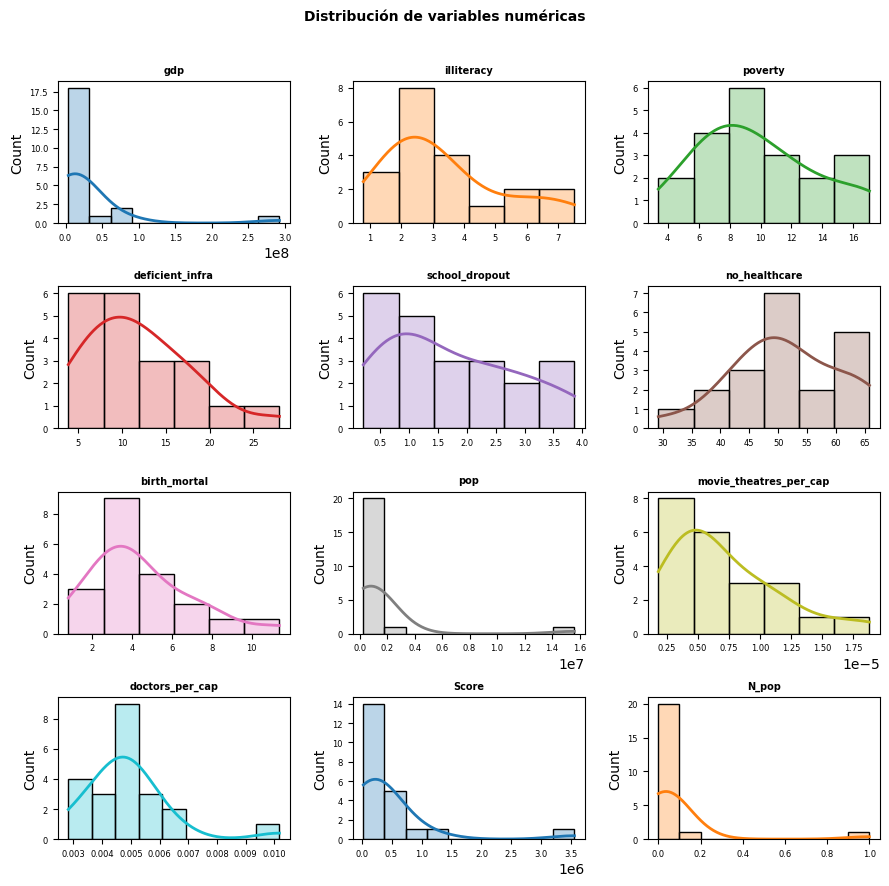

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(9, 9))
axes = axes.flat
columnas_numeric = df_mod.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df_mod,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables numéricas', fontsize = 10, fontweight = "bold");

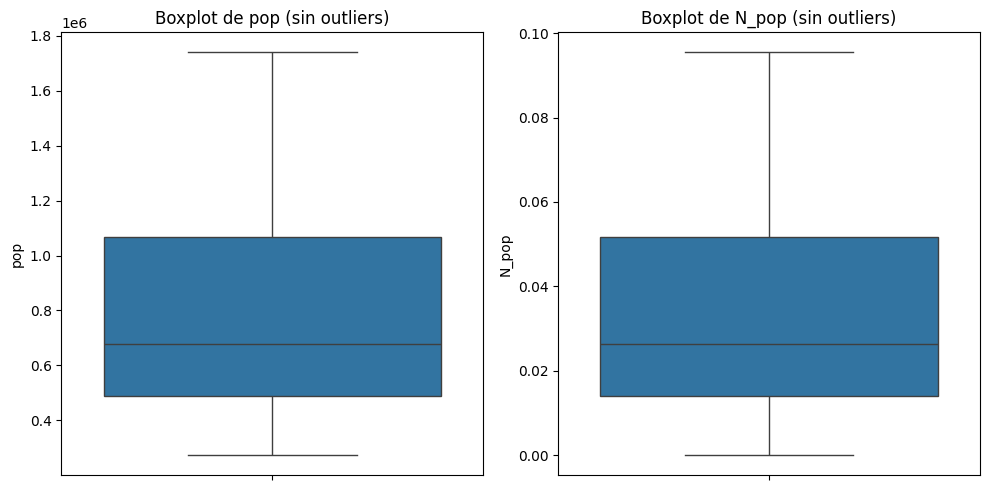

In [16]:
# Boxplot para comparar pop y N_pop excluyendo outliers usando índices

q1 = df_mod["pop"].quantile(0.25)
q3 = df_mod["pop"].quantile(0.75)
iqr = q3 - q1
sup = q3 + iqr * 1.5
inf = q1 - iqr * 1.5

# Encontrar índices de outliers
outliers_indices = np.where((df_mod["pop"] > sup) | (df_mod["pop"] < inf))[0]

# Excluir outliers
df_no_outliers = df_mod.drop(index=outliers_indices)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y=df_no_outliers["pop"], ax=axes[0])
axes[0].set_title("Boxplot de pop (sin outliers)")

sns.boxplot(y=df_no_outliers["N_pop"], ax=axes[1])
axes[1].set_title("Boxplot de N_pop (sin outliers)")

plt.tight_layout()
plt.show()

In [17]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_og.select_dtypes(include=['float64', 'int']).columns

# Normalizar
scaler = MinMaxScaler()
df_norm = df_og.copy()
df_norm[numeric_cols] = scaler.fit_transform(df_og[numeric_cols])

# Expandir poverty_index en 3 columnas (asumiendo que es tipo string/categoría)
poverty_dummies = pd.get_dummies(df_og['poverty_index'], prefix='poverty_index').astype(int)
df_norm = pd.concat([df_norm.drop('poverty_index', axis=1), poverty_dummies], axis=1)

df_norm

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index_High,poverty_index_Low,poverty_index_Middle
0,Buenos Aires,1.000000,NaN,0.349717,0.069191,0.153565,NaN,0.339623,1.000000,0.247140,0.273887,1.000000,0,0,1
1,Catamarca,0.008114,0.230840,0.427910,0.274140,0.204326,NaN,0.066038,0.006114,0.213094,0.228535,0.061319,1,0,0
2,Córdoba,0.226932,NaN,0.145460,0.272965,0.227028,0.451932,NaN,NaN,0.551096,1.000000,0.187423,0,1,0
3,Corrientes,0.014404,0.715264,0.685528,0.562753,1.000000,0.898790,0.481132,0.046813,0.130282,0.227608,0.039459,1,0,0
4,Chaco,0.020858,1.000000,0.913985,NaN,0.648431,0.991739,0.632075,0.050895,0.060446,0.106517,0.031641,1,0,0
5,Chubut,0.048258,0.112484,0.341207,0.174001,0.104426,0.281986,0.207547,0.015318,0.817728,0.227985,0.039876,0,0,1
6,Entre Ríos,0.058627,0.355941,0.285256,0.618855,0.459840,0.531021,0.216981,0.062668,0.226399,0.252566,0.104899,0,1,0
7,Formosa,0.000000,0.567812,1.000000,1.000000,0.564149,1.000000,NaN,0.016689,0.115137,0.084169,0.000982,1,0,0
8,Jujuy,0.009270,0.202183,NaN,0.357678,0.141305,0.681494,0.273585,0.026014,0.067949,0.154556,0.043360,1,0,0
9,La Pampa,0.011019,0.111181,0.000000,0.524138,0.000000,0.444070,0.603774,0.002931,1.000000,0.352622,0.004268,0,1,0


In [18]:
df_norm.drop("PROVINCIA", axis=1, inplace=True) # Eliminar la columna PROVINCIA del DataFrame normalizado

In [19]:
# Imputar valores faltantes con la mediana en todas las columnas numéricas
imputer = SimpleImputer(strategy='median')
df_norm[numeric_cols] = imputer.fit_transform(df_norm[numeric_cols])

# Si quieres imputar también las columnas dummy (por si acaso hay nulos)
df_norm[df_norm.columns.difference(numeric_cols)] = df_norm[df_norm.columns.difference(numeric_cols)].fillna(0)

df_norm

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index_High,poverty_index_Low,poverty_index_Middle
0,1.000000,0.308760,0.349717,0.069191,0.153565,0.574984,0.339623,1.000000,0.247140,0.273887,1.000000,0,0,1
1,0.008114,0.230840,0.427910,0.274140,0.204326,0.574984,0.066038,0.006114,0.213094,0.228535,0.061319,1,0,0
2,0.226932,0.308760,0.145460,0.272965,0.227028,0.451932,0.278302,0.026519,0.551096,1.000000,0.187423,0,1,0
3,0.014404,0.715264,0.685528,0.562753,1.000000,0.898790,0.481132,0.046813,0.130282,0.227608,0.039459,1,0,0
4,0.020858,1.000000,0.913985,0.290751,0.648431,0.991739,0.632075,0.050895,0.060446,0.106517,0.031641,1,0,0
5,0.048258,0.112484,0.341207,0.174001,0.104426,0.281986,0.207547,0.015318,0.817728,0.227985,0.039876,0,0,1
6,0.058627,0.355941,0.285256,0.618855,0.459840,0.531021,0.216981,0.062668,0.226399,0.252566,0.104899,0,1,0
7,0.000000,0.567812,1.000000,1.000000,0.564149,1.000000,0.278302,0.016689,0.115137,0.084169,0.000982,1,0,0
8,0.009270,0.202183,0.407534,0.357678,0.141305,0.681494,0.273585,0.026014,0.067949,0.154556,0.043360,1,0,0
9,0.011019,0.111181,0.000000,0.524138,0.000000,0.444070,0.603774,0.002931,1.000000,0.352622,0.004268,0,1,0


In [20]:
tabla_corr = df_norm.corr()
tb_corr = tabla_corr["poverty_index_High"].sort_values(ascending=False)
tabla_corr

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index_High,poverty_index_Low,poverty_index_Middle
gdp,1.000000,-0.130531,-0.230605,-0.284475,-0.182342,-0.123285,-0.069171,0.970389,-0.006717,0.231281,0.968215,-0.343714,0.068520,0.337273
illiteracy,-0.130531,1.000000,0.681562,0.329692,0.600441,0.793422,0.315175,-0.031303,-0.656706,-0.420832,-0.104789,0.561452,-0.265978,-0.387213
poverty,-0.230605,0.681562,1.000000,0.379726,0.434040,0.687324,0.264779,-0.100211,-0.605619,-0.622094,-0.212493,0.768732,-0.673446,-0.201491
deficient_infra,-0.284475,0.329692,0.379726,1.000000,0.130593,0.512529,-0.137402,-0.252049,-0.188631,-0.317048,-0.225668,0.311722,-0.000168,-0.371742
school_dropout,-0.182342,0.600441,0.434040,0.130593,1.000000,0.404817,0.493853,-0.132397,-0.435447,-0.175279,-0.197425,0.368413,-0.116642,-0.315600
no_healthcare,-0.123285,0.793422,0.687324,0.512529,0.404817,1.000000,0.089324,-0.008547,-0.697670,-0.438171,-0.079530,0.571516,-0.257372,-0.408367
birth_mortal,-0.069171,0.315175,0.264779,-0.137402,0.493853,0.089324,1.000000,-0.022317,0.105023,-0.115618,-0.194097,0.286802,-0.059125,-0.279355
pop,0.970389,-0.031303,-0.100211,-0.252049,-0.132397,-0.008547,-0.022317,1.000000,-0.117686,0.025153,0.958141,-0.234942,-0.058649,0.342643
movie_theatres_per_cap,-0.006717,-0.656706,-0.605619,-0.188631,-0.435447,-0.697670,0.105023,-0.117686,1.000000,0.399421,-0.070956,-0.516372,0.287663,0.310382
doctors_per_cap,0.231281,-0.420832,-0.622094,-0.317048,-0.175279,-0.438171,-0.115618,0.025153,0.399421,1.000000,0.173439,-0.518274,0.645191,-0.067306


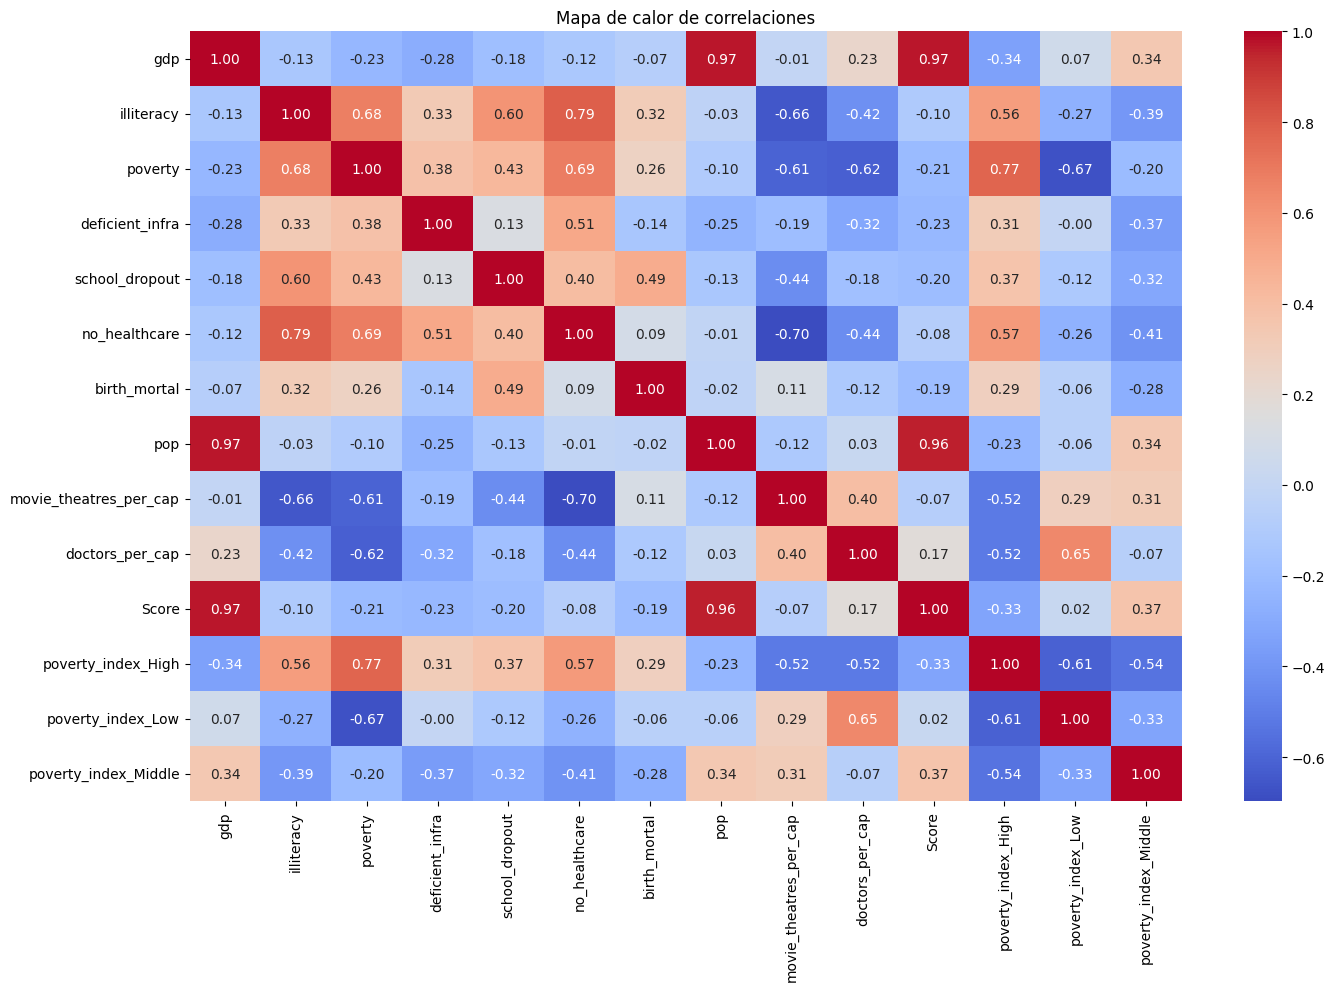

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_norm.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

In [22]:
# Guardar df_mod y tabla_corr en archivos CSV
df_mod.to_csv("Data frame consigna.csv", index=False)
df_norm.to_csv("Data frame analisis.csv")